<a href="https://colab.research.google.com/github/ManuelaCastano/CuadernosyEjercicios/blob/main/ManuelaCasta%C3%B1o_PARCIAL_2_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARCIAL 2 - SEÑALES Y SISTEMAS

1. Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal x(t) = |A sin(2πF₀t)|², con t ∈ [−1/(2F₀), 1/(2F₀)], con A, F₀ ∈ ℝ⁺.




wo= 6.283185307179586
Fo= 1


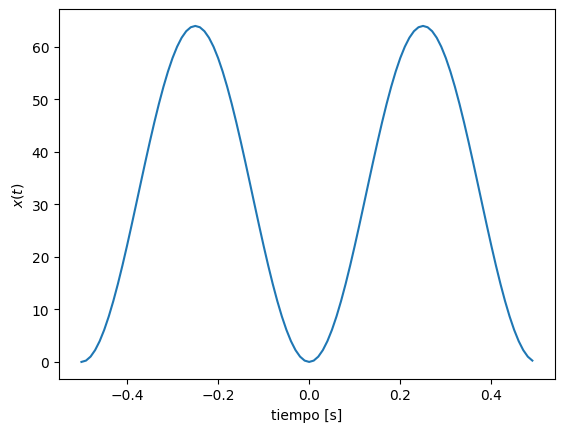

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = 8 #amplitud
Fo = 1 #frecuencia fundamental
To = 1/Fo #periodo de oscilación
ti = -To/2 #tiempo inicial
tf = To/2 #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
print('wo=',wo)
print('Fo=',Fo)
Fs = 100*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(-To/2,To/2,1/Fs) #vector de tiempo

x = abs(A*np.sin(2*np.pi*Fo*tv))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

2. Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud y fase como diagrama de Bode en decibelios), y presente el error relativo y la senal reconstruida para N = {1, 2, . . . , 50}.

In [ ]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 50 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=50, min=-50), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

<ipython-input-3-038e410744fc>:25: RuntimeWarning: divide by zero encountered in log10
  plt.stem(nv, 20*np.log10(abs(cn)), 'r')#magnitud del espectro


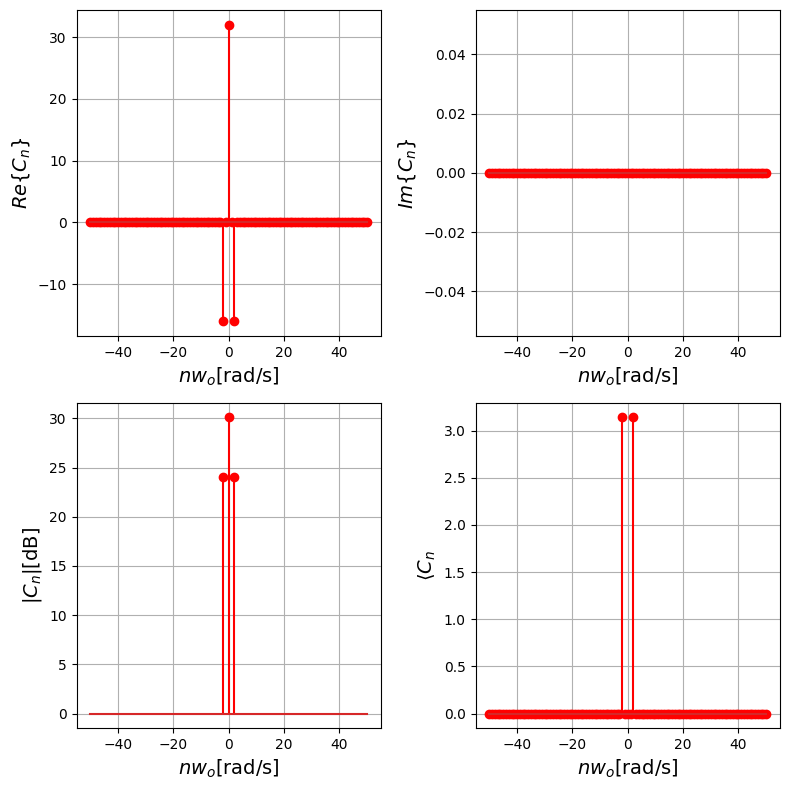

In [ ]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = A**2/2 # nivel dc C_0
cn[N-2] = -(A**2/4) #armónico -2
cn[N+2] = -(A**2/4) #armónico +2

#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, 20*np.log10(abs(cn)), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$[dB]',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [ ]:
#graficar reconstrucción

Px = 3*(A**4)/8 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # PORCENTAJE DE ERROR, dot calcula el producto entre vectores
    plt.plot(tv,x,color='r',label='$x(t)$') #señal original
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

3. Sea la señal portadora c(t) = Ac sin(2πFct), con Ac, Fc ∈ R, y la señal mensaje m(t) ∈ R. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), y(t) = (1 + m(t)/Ac) c(t).
Luego, descargue desde YouTube 5 segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada.
Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio.
El usuario debe poder escoger el índice de modulación deseado.



In [13]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [14]:
!pip install yt-dlp #Instalar la librería yt-dlp para descargar audios de youtube

In [15]:
import yt_dlp #importamos la librería
import os #importamos os para manipular un archivo, en este caso el audio
ydl_opts = {  #diccionario de opciones para descargar el audio
    'format': 'bestaudio[ext=m4a]',
    'outtmpl': 'audio.mp3'
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:  #contexto with para descargar el audio
    ydl.download(['https://www.youtube.com/watch?v=0TFNGRYMz1U&list=RD0TFNGRYMz1U&start_radio=1']) #Ponemos el link de la canción

[youtube:tab] Extracting URL: https://www.youtube.com/watch?v=0TFNGRYMz1U&list=RD0TFNGRYMz1U&start_radio=1
[youtube:tab] Downloading playlist RD0TFNGRYMz1U - add --no-playlist to download just the video 0TFNGRYMz1U
[youtube:tab] RD0TFNGRYMz1U: Downloading webpage
[download] Downloading playlist: Mix - ZAZ - Je veux (Clip officiel)
[youtube:tab] RD0TFNGRYMz1U page 1: Downloading API JSON
[youtube:tab] RD0TFNGRYMz1U page 2: Downloading API JSON
[youtube:tab] RD0TFNGRYMz1U page 3: Downloading API JSON
[youtube:tab] RD0TFNGRYMz1U page 4: Downloading API JSON
[youtube:tab] RD0TFNGRYMz1U page 5: Downloading API JSON
[youtube:tab] RD0TFNGRYMz1U page 6: Downloading API JSON
[youtube:tab] RD0TFNGRYMz1U page 7: Downloading API JSON
[youtube:tab] RD0TFNGRYMz1U page 8: Downloading API JSON
[youtube:tab] RD0TFNGRYMz1U page 9: Downloading API JSON
[youtube:tab] Playlist Mix - ZAZ - Je veux (Clip officiel): Downloading 216 items of 216
[download] Downloading item 1 of 216
[youtube] Extracting URL: ht

KeyboardInterrupt: 

In [ ]:
# Convierte a .wav usando ffmpeg
#ffmpeg linea de comandos utilizada para procesar archivos
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [10]:
import soundfile as sf # para instalar pip install soundfile
import numpy as np # para instalar pip install numpy
import matplotlib.pyplot as plt # para instalar pip install matplotlib
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 44100.00[Hz]
audio output.wav


In [11]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg (EXPRESADO EN SEGUNDOS)
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [12]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

In [ ]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(0,len(m))/fs # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('Tiempo[s]')
plt.ylabel('m[t]')
plt.legend()
plt.show()

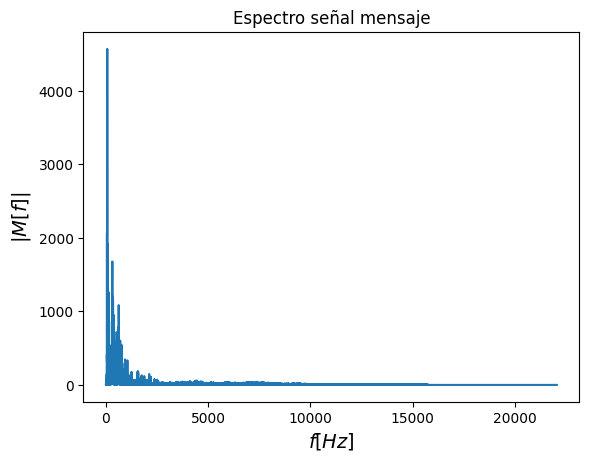

In [ ]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # Vector de pesos(espectro) ,axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

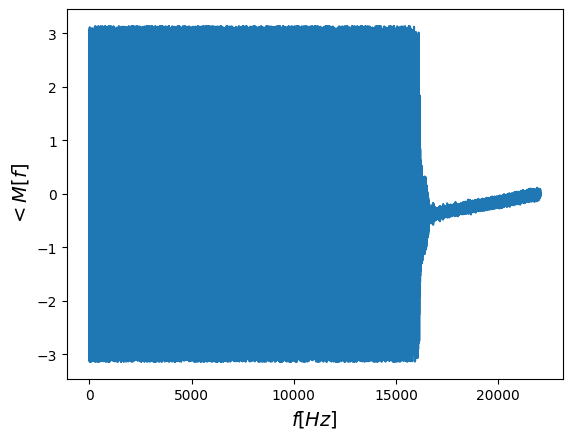

In [ ]:
plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

In [ ]:
Fc = 15000 #frecuencia portadora #PREGUNTAR
Im = 0.5 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*tt) #portadora

In [ ]:
#repoducir portadora
Audio(c,rate=fs) #PELIGRO

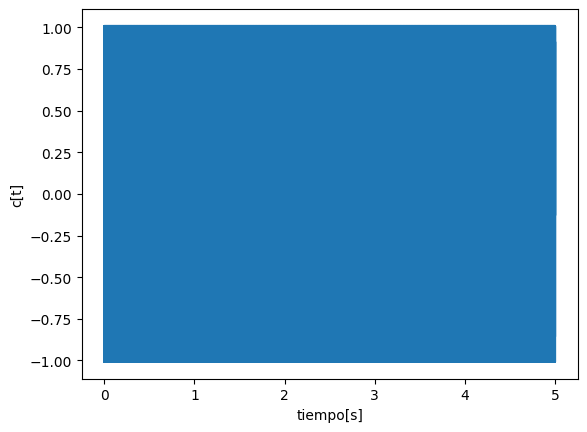

In [ ]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('c[t]')
plt.show()

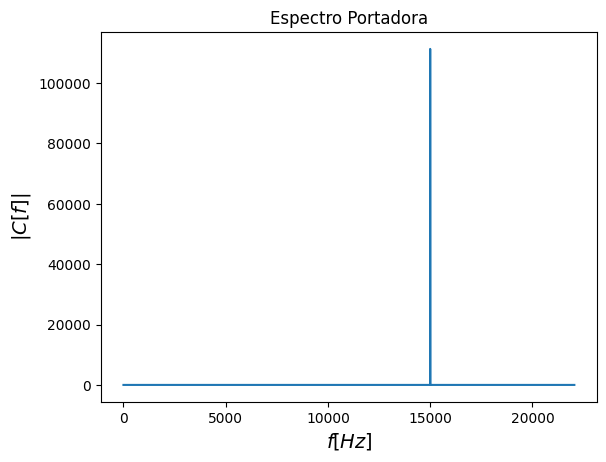

In [ ]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # ESPECTRO, axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()

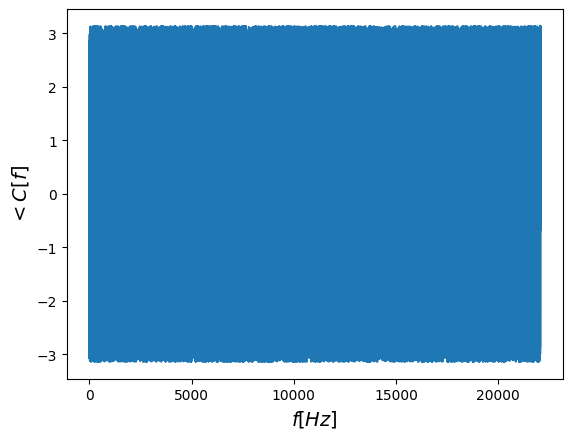

In [ ]:
plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), y(t) = (1 + m(t)/Ac) c(t).

In [ ]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [ ]:
#repoducir modulada
Audio(y,rate=fs)

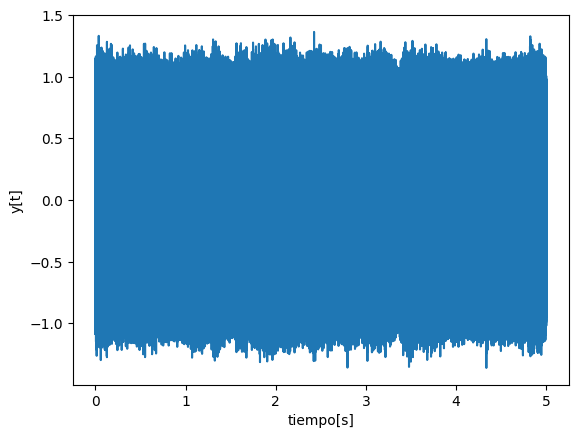

In [ ]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('y[t]')
plt.show()

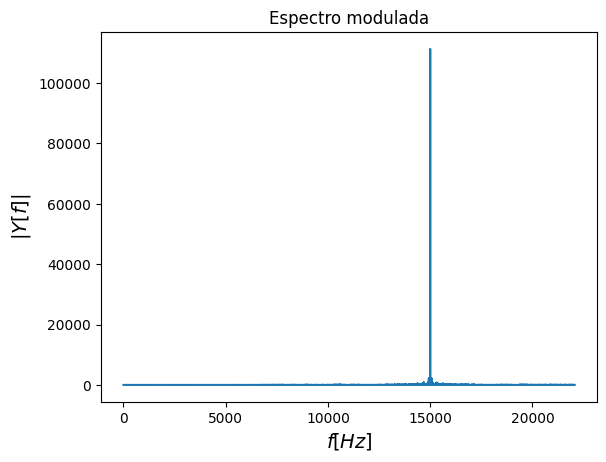

In [ ]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()

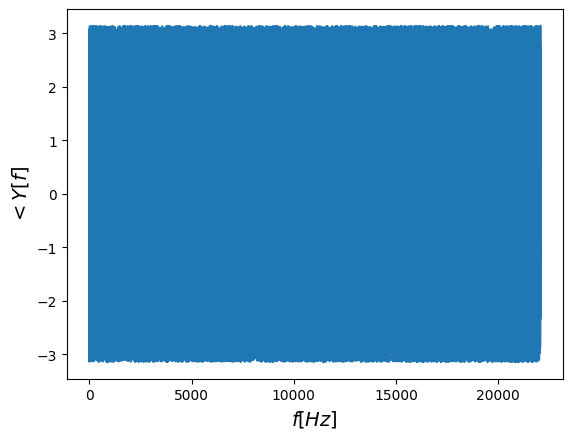

In [ ]:
plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

4. Consulte en qué consiste la distorsión total de armónicos (Total Harmonic Distortion - THD) y el factor de potencia en un circuito eléctrico. ¿Cómo puede calcularse el THD desde la FFT? ¿Cómo puede calcularse la distorsión del factor de potencia con base al THD? Genere un ejemplo ilustrativo para el cálculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga:
i) netamente resistiva.
ii) carga RC en serie.
Establezca las condiciones necesarias para las simulaciones. El usuario podrá escoger diferentes valores de R y C. Discuta los resultados obtenidos.


THD para carga resistiva: 33146.60%
THD para carga RC: 351.41%


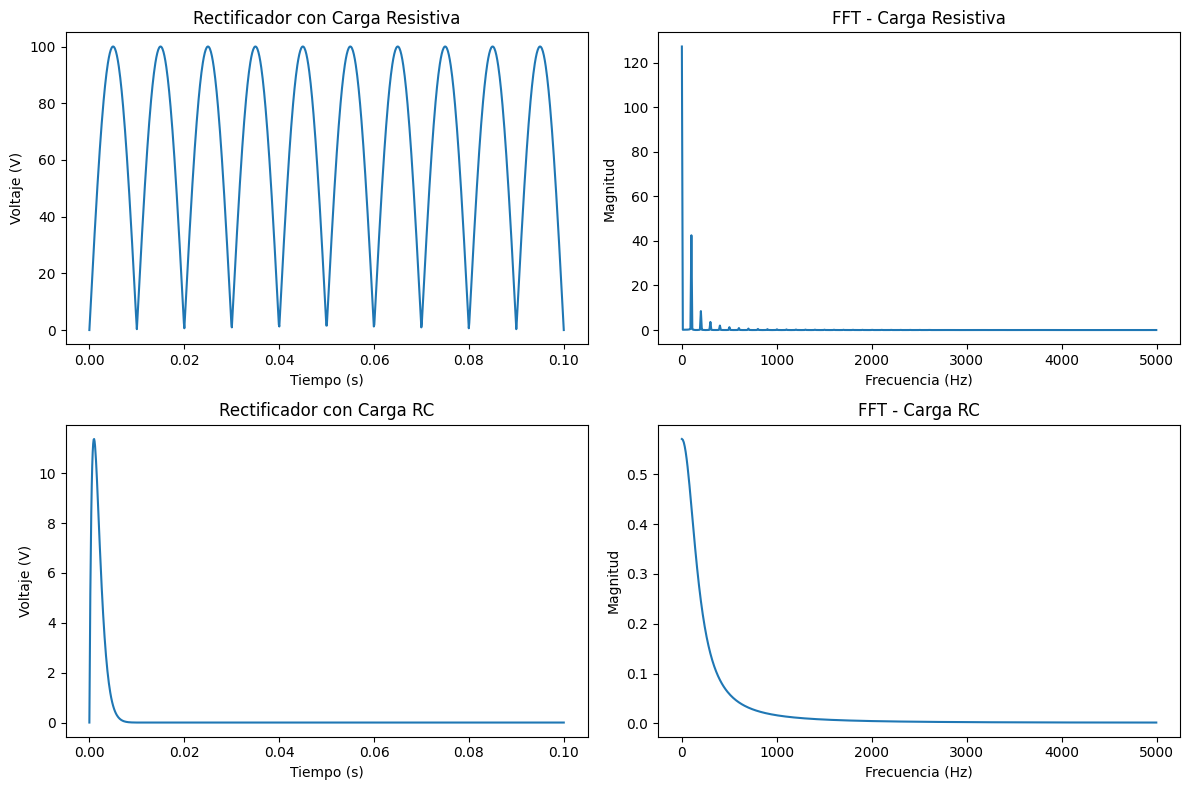

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Parámetros
f = 50  # Frecuencia de la señal en Hz
R = 10  # Resistencia en ohmios
C = 100e-6  # Capacitancia en faradios
V_m = 100  # Amplitud de la señal

# Tiempo
t = np.linspace(0, 0.1, 1000)  # 0.1 segundos de simulación

# Señal de entrada (Onda senoidal)
V_in = V_m * np.sin(2 * np.pi * f * t)

# Respuesta del rectificador de onda completa con carga resistiva
V_rect_resistivo = np.abs(V_in)

# Respuesta del rectificador con carga RC
tau = R * C
V_rect_RC = np.abs(V_in) * np.exp(-t/tau)

# FFT para calcular la THD
def calculate_thd(signal, fs):
    N = len(signal)
    Y = fft(signal)
    Y = 2.0/N * np.abs(Y[:N//2])
    f = np.linspace(0.0, fs/2.0, N//2)

    fundamental = Y[1]
    harmonics = np.sqrt(np.sum(Y[2:]**2))

    THD = harmonics / fundamental
    return THD, Y, f

# THD para carga resistiva
fs = 1 / (t[1] - t[0])
THD_resistivo, Y_resistivo, f_resistivo = calculate_thd(V_rect_resistivo, fs)

# THD para carga RC
THD_RC, Y_RC, f_RC = calculate_thd(V_rect_RC, fs)

# Resultados
print(f'THD para carga resistiva: {THD_resistivo:.2%}')
print(f'THD para carga RC: {THD_RC:.2%}')

# Gráfica de las señales y sus FFT
plt.figure(figsize=(12, 8))

# Señal y FFT para carga resistiva
plt.subplot(2, 2, 1)
plt.plot(t, V_rect_resistivo)
plt.title("Rectificador con Carga Resistiva")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")

plt.subplot(2, 2, 2)
plt.plot(f_resistivo, Y_resistivo)
plt.title("FFT - Carga Resistiva")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")

# Señal y FFT para carga RC
plt.subplot(2, 2, 3)
plt.plot(t, V_rect_RC)
plt.title("Rectificador con Carga RC")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")

plt.subplot(2, 2, 4)
plt.plot(f_RC, Y_RC)
plt.title("FFT - Carga RC")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")

plt.tight_layout()
plt.show()